# Multi-panel figure showing relative timing of winter velocity peak 2018-2023

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import xarray
import pyproj

## Load velocity data

In [4]:
ds = xarray.load_dataset("../velocity/Hubbard_5eminus5.nc")
ds["v"] = np.sqrt(ds.vx**2 + ds.vy**2).fillna(0)
ds["month"] = ds.time.dt.month
ds["year"] = ds.time.dt.year
ds["doy"] = ds.time.dt.dayofyear

## Fiddling around

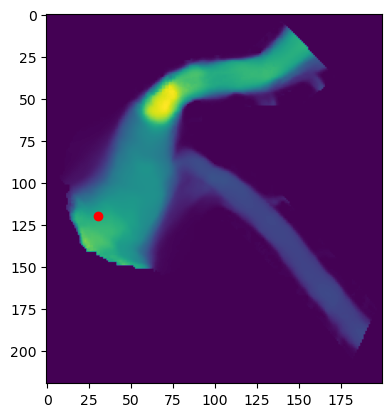

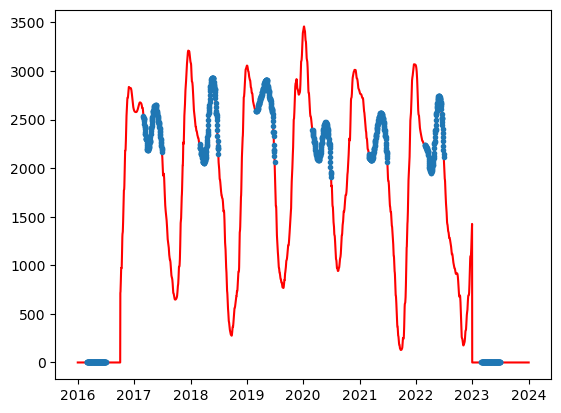

In [27]:
x, y = (30, 120)
#x, y = (100, 40)

plt.imshow(np.mean(ds.v, axis=0))
plt.plot([x], [y], "ro")

plt.figure()
plt.plot(ds.time, ds.v[:,y,x], 'r-')
#mask = np.logical_or(
#    ds.month >= 11,
#    ds.month <= 2,
#)
mask = np.logical_and(
    ds.month >= 3 ,
    ds.month <= 6,
)
plt.plot(ds.time[mask], ds.v[:,y,x][mask], '.')

## Detect winter peak in each pixel in each year

To-do
Mask out no-winter-peak pixels, try tightening color scale

/tmp/ipykernel_131673/3844443830.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=axs, aspect=50, shrink=.5, label="Winter peak time relative to peak at ref. point (days)")


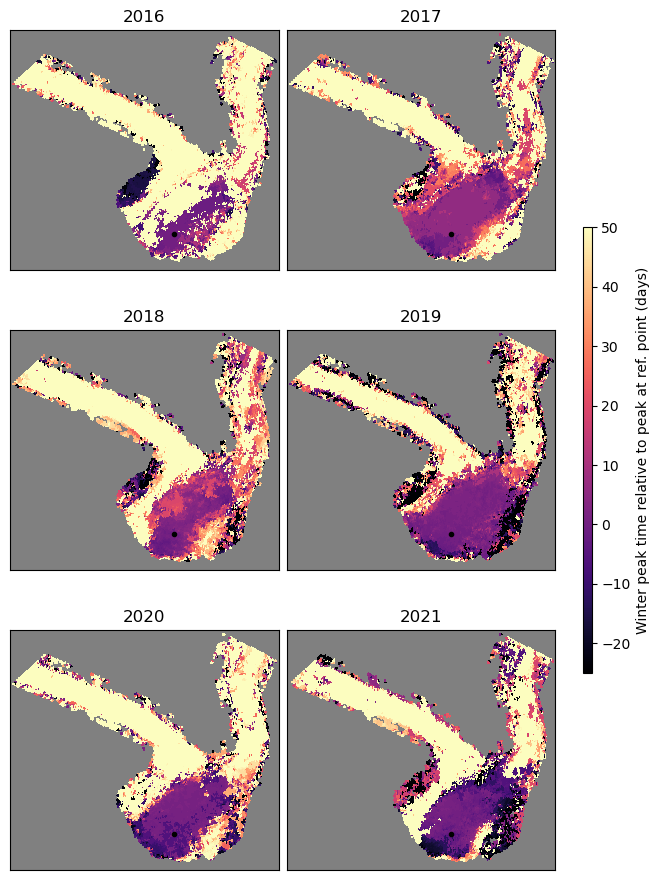

In [26]:
fig, axs = plt.subplots(3, 2, figsize=(6.5, 9), layout="constrained")
axs = axs.flatten()
xform = pyproj.Transformer.from_crs(3413, 3338)
xx, yy = np.meshgrid(ds.x, ds.y)
px, py = xform.transform(xx, yy)

for i, year in enumerate([2016, 2017, 2018, 2019, 2020, 2021]):
    mask = np.logical_or(
        np.logical_and(ds.month >= 11, ds.year == year),
        np.logical_and(ds.month <= 2, ds.year == year+1)
    )
    peakdoy = ds.doy[mask][ds.v[mask, :, :].argmax(dim="time", skipna=True)].to_numpy().astype(np.float32)

    # If max value is at first day then no peak
    peakdoy[peakdoy == 306] = np.nan
    peakdoy[peakdoy == 305] = np.nan

    peakdoy[peakdoy > 180] = peakdoy[peakdoy > 180] - 365
    x,y = (35, 120)
    cdate = peakdoy[y, x]
    peakdoy -= cdate
    im = axs[i].pcolor(px, py, peakdoy, vmin=-25, vmax=50, cmap="magma")
    axs[i].plot([px[y,x]], [py[y,x]], "k.")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(year)
    axs[i].set_facecolor("grey")
    axs[i].set_xlim(np.min(px)+1.8e3, np.max(px)-5e3)
    axs[i].set_ylim(np.min(py)+4e3, np.max(py)-4e3)
    axs[i].set_aspect(1)


fig.colorbar(im, ax=axs, aspect=50, shrink=.5, label="Winter peak time relative to peak at ref. point (days)")

fig.savefig("winter_peak_time.png", bbox_inches="tight", dpi=300)

## Summer peak

/tmp/ipykernel_131673/2720750444.py:31: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=axs, aspect=50, shrink=.5, label="Summer peak time relative to peak at ref. point (days)")


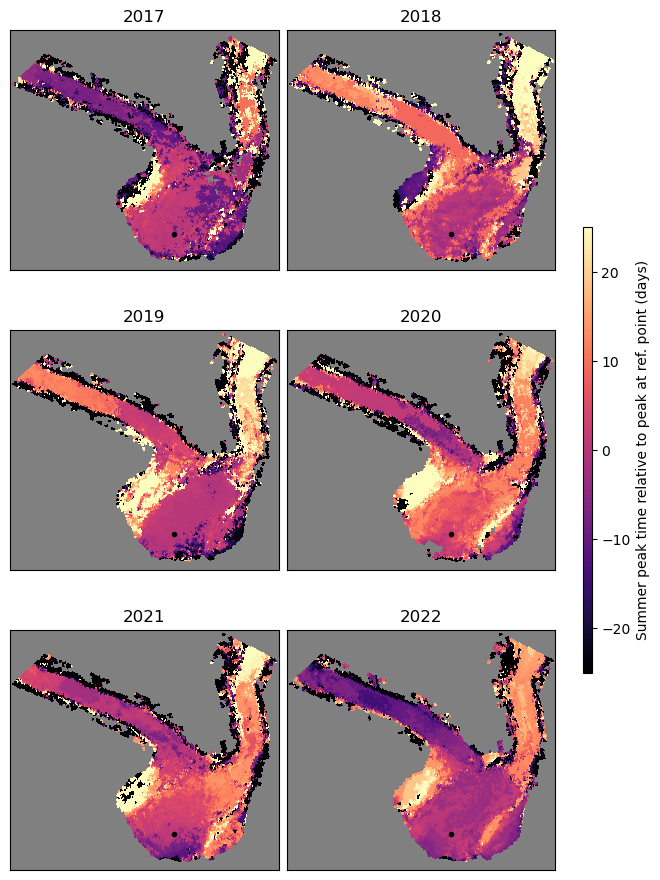

In [40]:
fig, axs = plt.subplots(3, 2, figsize=(6.5, 9), layout="constrained")
axs = axs.flatten()
xform = pyproj.Transformer.from_crs(3413, 3338)
xx, yy = np.meshgrid(ds.x, ds.y)
px, py = xform.transform(xx, yy)

for i, year in enumerate([2017, 2018, 2019, 2020, 2021, 2022]):
    mask = np.logical_and(
        np.logical_and(ds.month >= 3, ds.month <= 6),
        ds.year == year,
    )
    peakdoy = ds.doy[mask][ds.v[mask, :, :].argmax(dim="time", skipna=True)].to_numpy().astype(np.float32)

    # If max value is at first day then no peak
    peakdoy[peakdoy == 60] = np.nan
    peakdoy[peakdoy == 61] = np.nan

    peakdoy[peakdoy > 180] = peakdoy[peakdoy > 180] - 365
    x,y = (35, 120)
    cdate = peakdoy[y, x]
    peakdoy -= cdate
    im = axs[i].pcolor(px, py, peakdoy, vmin=-25, vmax=25, cmap="magma")
    axs[i].plot([px[y,x]], [py[y,x]], "k.")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(year)
    axs[i].set_facecolor("grey")
    axs[i].set_xlim(np.min(px)+1.8e3, np.max(px)-5e3)
    axs[i].set_ylim(np.min(py)+4e3, np.max(py)-4e3)
    axs[i].set_aspect(1)


fig.colorbar(im, ax=axs, aspect=50, shrink=.5, label="Summer peak time relative to peak at ref. point (days)")

fig.savefig("summer_peak_time.png", bbox_inches="tight", dpi=300)

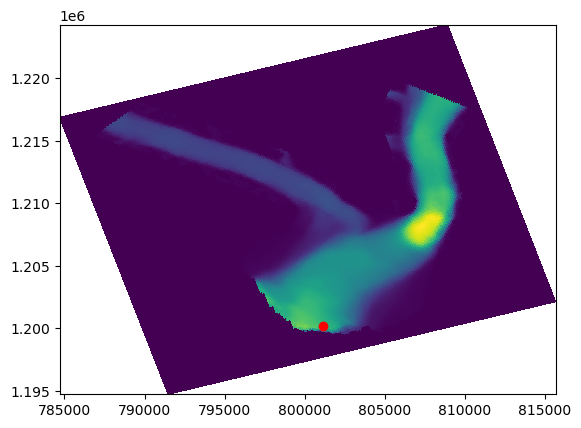

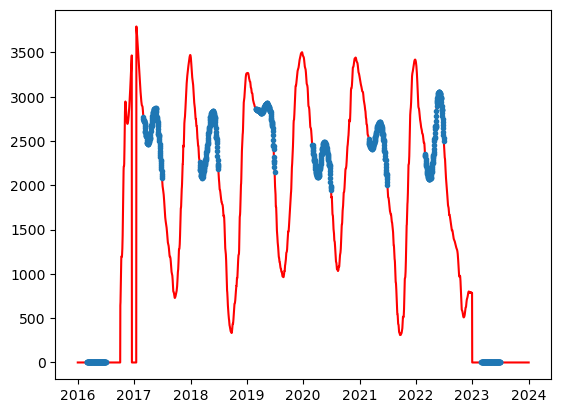

In [37]:
x, y = (20, 125)

plt.pcolor(px, py, np.mean(ds.v, axis=0))
plt.plot([px[y,x]], [py[y,x]], "ro")

plt.figure()
plt.plot(ds.time, ds.v[:,y,x], 'r-')
#mask = np.logical_or(
#    ds.month >= 11,
#    ds.month <= 2,
#)
mask = np.logical_and(
    ds.month >= 3 ,
    ds.month <= 6,
)
plt.plot(ds.time[mask], ds.v[:,y,x][mask], '.')